In [400]:
from sklearn.datasets import load_diabetes
from sklearn.linear_model import Lasso
import numpy as np


In [222]:
import matplotlib.pyplot as plt

In [43]:
import pandas as pd

In [4]:
import seaborn as sns

## Задание 3

In [276]:
data, target = load_diabetes(as_frame=True, return_X_y=True)

In [283]:
alphas = np.linspace(1e-6, 1, 200) # сетка параметров   
coefs = [] # коэффициенты модели
for a in alphas:
    model = Lasso()
    model.set_params(alpha = a)
    model.fit(data, target)
    coefs.append(model.coef_) 
#coefs

In [279]:
category = data.columns.to_list()
category

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [282]:
np.array(coefs).T

array([[ -10.00885256,   -5.63286873,   -1.2601264 , ...,    0.        ,
           0.        ,    0.        ],
       [-239.81472427, -234.28600374, -228.76289573, ...,   -0.        ,
          -0.        ,   -0.        ],
       [ 519.84634171,  522.72620949,  525.59521534, ...,  370.06948063,
         368.88666335,  367.70385976],
       ...,
       [ 177.05062016,  148.10985123,  119.30618856, ...,    0.        ,
           0.        ,    0.        ],
       [ 751.24775484,  660.62981483,  570.41700625, ...,  309.98001038,
         308.79271718,  307.6054181 ],
       [  67.62654232,   66.31131765,   64.99493994, ...,    0.        ,
           0.        ,    0.        ]])

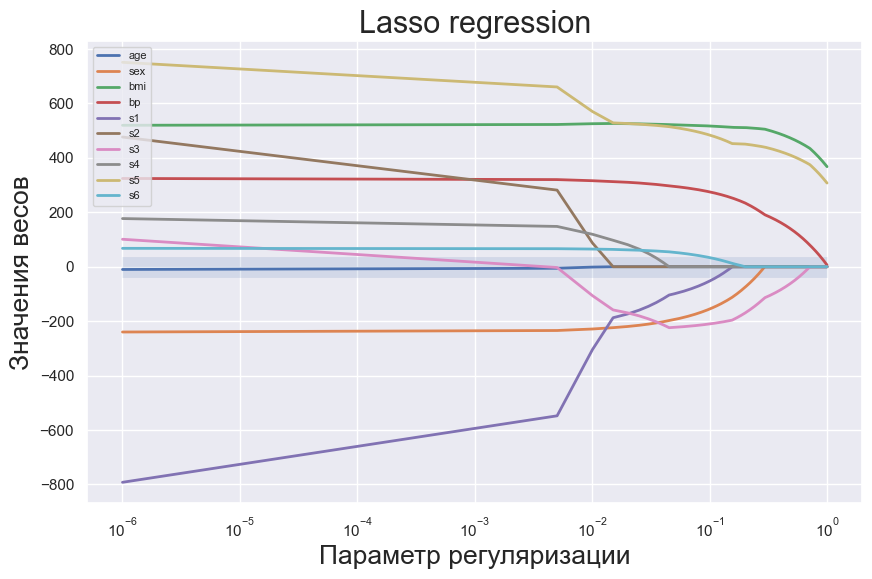

In [457]:
plt.figure(figsize=(10,6))
ax = plt.gca() # используется для получения текущего экземпляра axes
ax.hlines(0, 1e-6, 1, linewidth=15, alpha=0.15)
ind = 0
for coef in np.array(coefs).T:
    label = category[ind]
    ax.plot(alphas, coef, linewidth=2, label=label) # рисуем коэффициенты в зависимости от alpha
    ind += 1
        
ax.set_xscale('log') # логарифмическая шкала
plt.xlabel('Параметр регуляризации', fontsize=19)
plt.ylabel('Значения весов', fontsize=19)
plt.title('Lasso regression', fontsize=22)
plt.legend(loc='upper left', fontsize=8)
plt.axis('tight')
plt.show()

Можем пронаблюдать, как с увеличением параметра регуляризации веса признаков зануляются, и остаются только самые "сильные"

## Задание 4

Возьмем функцию $$f(x)=3e^x-2x^2$$

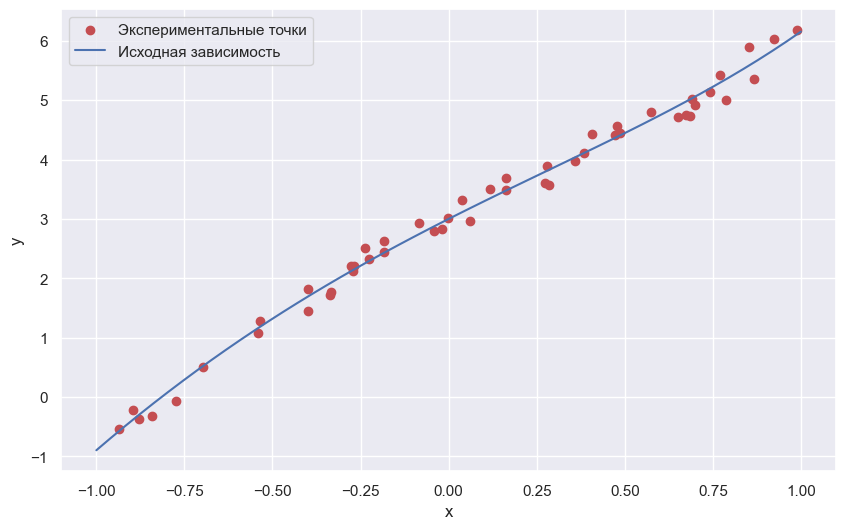

In [562]:
X = np.random.rand(50, 1) * 2 - 1  # Данные в диапазоне [-1, 1]
noise = np.random.normal(0, 0.2, size=X.shape)
y = 3 * np.exp(X) - 2 * X**2 + noise
X_1 = np.linspace(-1,1,50)
y_1 = 3 * np.exp(X_1) - 2 * X_1**2
plt.figure(figsize=(10,6))
plt.scatter(X,y, label='Экспериментальные точки', color='r')
plt.plot(X_1,y_1, label='Исходная зависимость')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [627]:
matrix = np.hstack([np.exp(X), (X)**2])  # Матрица объект-признак

In [828]:
def make_L1_regression_grad_descent_iteration(X, y, w, mu, alpha):
    grad = 2 * X.T@(X @ w - y) / X.shape[0] +  mu * np.sign(w)
    w = w -  alpha * grad
    return grad, w

In [926]:
w0 = np.array([[10],[10]])  # Начальные веса
mu = 0.1  # Пробный коэффициент регуляризации
alpha = 0.1  # Пробный шаг градиентного спуска (learning rate)
epsilon = 1e-6

Посчитаем градиент и его норму в стартовой произвольной точке:

In [927]:
grad_f = make_L1_regression_grad_descent_iteration(matrix, y, w0, mu, alpha)[0]
n_grad = np.linalg.norm(grad_f, 2)
grad_f, n_grad

(array([[38.4883444 ],
        [10.47042564]]),
 39.887121579638766)

In [928]:
evolution_w1_w2 = np.array(w0)
evolution_w1_w2

array([[10],
       [10]])

Перейдём к самому градиентному спуску:

In [929]:
while n_grad > epsilon:

    w0 = make_L1_regression_grad_descent_iteration(matrix, y, w0, mu, alpha)[1]        # Пока норма градиента больше эпсилон, будем итерироваться по нашим весам в сторону 
    grad_f = make_L1_regression_grad_descent_iteration(matrix, y, w0, mu, alpha)[0]    # антиградиента, в конце получим веса, при которых норма градиента меньше эпсилон
    n_grad = np.linalg.norm(grad_f, 2)
    evolution_w1_w2 = np.hstack((evolution_w1_w2, w0))
w0

array([[ 2.79440949],
       [-1.22585302]])

In [1051]:
from sklearn.metrics import mean_squared_error

In [1052]:
y_pred = matrix@w0
mean_squared_error(y_pred, y)

0.0803140630815553

Усредненная разность квадратов дала результат около 0,08

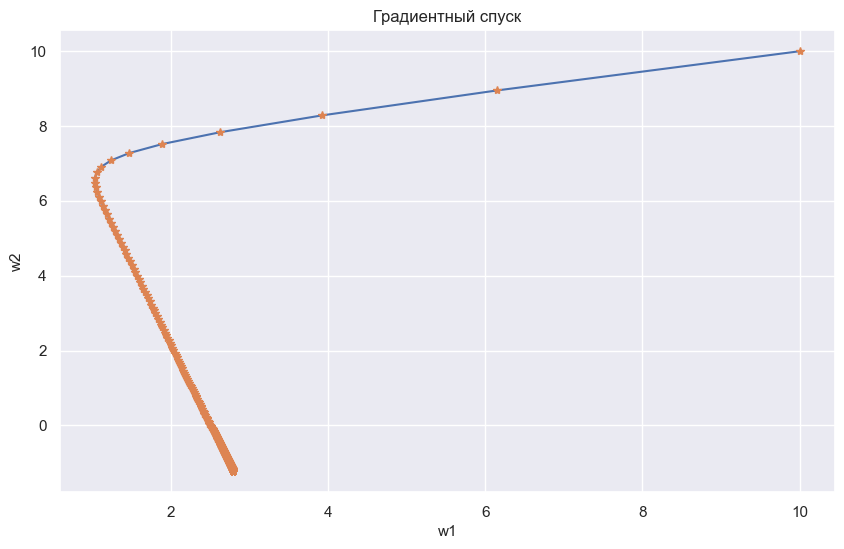

In [940]:
evolution_w1 = evolution_w1_w2[0,:]
evolution_w2 = evolution_w1_w2[1,:]
plt.figure(figsize=(10,6))
plt.title('Градиентный спуск')
plt.plot(evolution_w1, evolution_w2)
plt.plot(evolution_w1, evolution_w2, '*', label = "Cost function")
plt.xlabel('w1', fontsize=11)
plt.ylabel('w2', fontsize=11)
plt.grid(True)
plt.show()


При помощи GridSearch найдем оптимальные параметры градиентного спуска: коэффициент регуляризации и learning rate

In [1042]:
array = np.linspace(0.001,1,1000)

In [942]:
from sklearn.model_selection import GridSearchCV

In [992]:
from sklearn.linear_model import SGDRegressor

In [1043]:
mu_values = {'alpha': array}

In [1049]:
lasso = GridSearchCV(Lasso(), mu_values, scoring='neg_mean_squared_error', cv=10)
lasso.fit(matrix,y).best_params_

{'alpha': 0.001}

In [1066]:
rate_values = {'eta0' : array}

In [1070]:
tt = GridSearchCV(SGDRegressor(loss = 'squared_error', penalty = 'l1', learning_rate = 'constant'), rate_values, cv=10)
tt.fit(matrix,np.ravel(y)).best_params_

{'eta0': 0.114}

GridSearch показывает, что оптимальным параметром регуляризации является значение $\mu$=0.001, а оптимальным параметром шага градиентного спуска является $\eta_0$=0.114

Проделаем процедуру выше ещё раз, но с новыми параметрами

In [1079]:
w0 = np.array([[10],[10]])  # Начальные веса
mu = 0.001  # Оптимальный коэффициент регуляризации
alpha = 0.114  # Оптимальный шаг градиентного спуска (learning rate)
epsilon = 1e-6
grad_f = make_L1_regression_grad_descent_iteration(matrix, y, w0, mu, alpha)[0]
n_grad = np.linalg.norm(grad_f, 2)
grad_f, n_grad
while n_grad > epsilon:

    w0 = make_L1_regression_grad_descent_iteration(matrix, y, w0, mu, alpha)[1]        # Пока норма градиента больше эпсилон, будем итерироваться по нашим весам в сторону 
    grad_f = make_L1_regression_grad_descent_iteration(matrix, y, w0, mu, alpha)[0]    # антиградиента, в конце получим веса, при которых норма градиента меньше эпсилон
    n_grad = np.linalg.norm(grad_f, 2)
w0

array([[ 3.00791461],
       [-2.06471463]])

In [1080]:
y_pred = matrix@w0
mean_squared_error(y_pred, y)

0.027168685485549977

Оказалось, что ошибка в таком случае меньше примерно в три раза (было около 0,08)

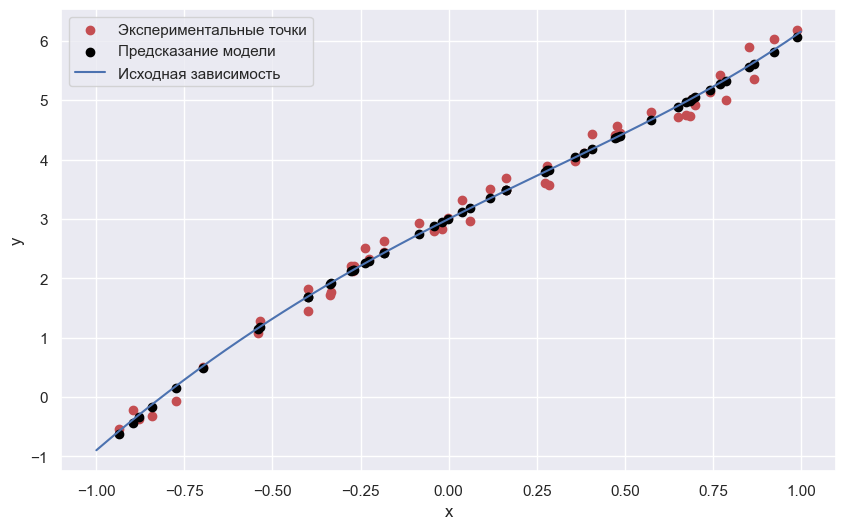

In [1081]:
plt.figure(figsize=(10,6))
plt.scatter(X,y, label='Экспериментальные точки', color='r')
plt.scatter(X,y_pred, label='Предсказание модели', color='black')
plt.plot(X_1,y_1, label='Исходная зависимость')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()